# Исследование аренды самокатов 

В нашем распоряжении находятся данные сервиса аренды самокатов GoFast. Данные разбиты на три категории: <br>
1. Данные о пользователях: ID, имя, возраст, город, тип подписки.
2. Данные о поездках: ID, расстояние в текущей сессии, продолжительность сессии, дата завершения поездки.
3. Данные о подписках: тип подписки, стоимость одной минуты по подписке, стоимость начала поездки.
<br>Существует два способа пользования сервисом:
        1. Без подписки
        2. С подпиской Ultra
В зависимости он наличия подписки, различается стоимость непосредственно поездки, абонентской платы и старта.

**Цель исследования:**
- Оценить время, которое тратят пользователи с подпиской и без на поездки.
- Оценить среднее расстояниие одной поездки.
- Оценить выручку от пользователей с подпиской и без.

**Ход исследования:**

Данные для исследования я получу из датасетов: `users_go.csv`, `rides_go.csv`, `subscriptions_go.csv`. О качестве данных ничего не известно, это значит, что в первую очередь необходимо будет провести обзор данных.

Я проверю данные на наличие различного рода ошибок. Затем, на этапе предобработки данных, я поищу возможность иправить обнаруженные ошибки, которые способны привести к ложному результату. Далее я постараюсь привести данные к состоянию, в котором с ними наиболее удобно работать, и приступлю к проведению анализа данных.

Таким образом, моё исследование будет состоять из следующих этапов:
- Обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Объединение данных
- Подсчёт выручки
- Проверка гипотез

In [287]:
import math
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

## Шаг 1. Загрузка данных

In [148]:
data_users = pd.read_csv('data_project_users_4.csv')
print('Информация о пользователях:')
display(data_users.head())
print(data_users.info())
print('Размер таблицы:', data_users.shape)
print('Число дубликатов:', data_users.duplicated().sum())

Информация о пользователях:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
Размер таблицы: (1565, 5)
Число дубликатов: 31


count    1565.000000
mean       24.922045
std         4.553496
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


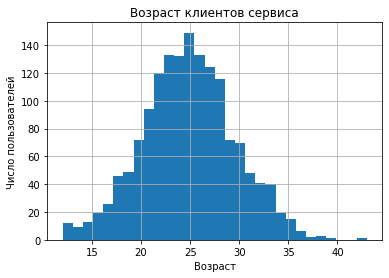

In [149]:
#Рассмотрим возраст клиентов сервиса
print(data_users['age'].describe())
data_users['age'].hist(bins = 30)
plt.title('Возраст клиентов сервиса')
plt.xlabel('Возраст')
plt.ylabel('Число пользователей')
plt.show()

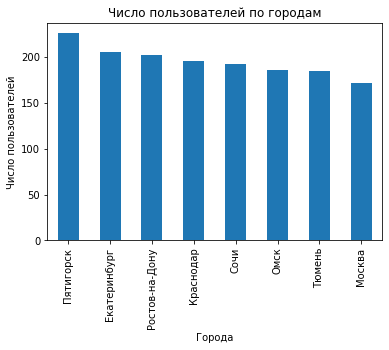

In [150]:
data_users['city'].value_counts().plot(kind = 'bar')
plt.title('Число пользователей по городам')
plt.xlabel('Города')
plt.ylabel('Число пользователей')
plt.show()

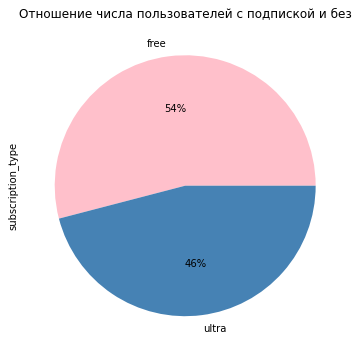

In [151]:
data_users['subscription_type'].value_counts().plot(kind = 'pie',
                                                    title = 'Отношение числа пользователей с подпиской и без', 
                                                    figsize=(6, 6),
                                                    autopct='%1.0f%%', 
                                                    colors = ['pink', 'steelblue'])
plt.show()

In [152]:
data_rides = pd.read_csv('data_project_rides_4.csv')
print('Информация о поездках:')
display(data_rides.head())
print(data_rides.info())
print('Размер таблицы:', data_rides.shape)
print('Число дубликатов:', data_rides.duplicated().sum())

Информация о поездках:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
Размер таблицы: (18068, 4)
Число дубликатов: 0


count    1534.000000
mean       11.778357
std         4.157738
min         2.000000
25%         9.000000
50%        12.000000
75%        14.000000
max        27.000000
Name: user_id, dtype: float64


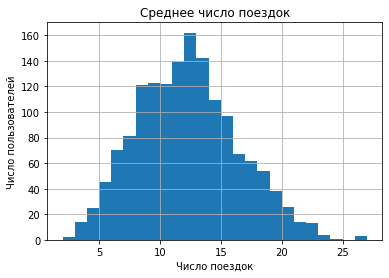

In [153]:
print(data_rides['user_id'].value_counts().describe())
data_rides['user_id'].value_counts().hist(bins = 25)
plt.title('Среднее число поездок')
plt.xlabel('Число поездок')
plt.ylabel('Число пользователей')
plt.show()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


Text(0, 0.5, 'Число поездок')

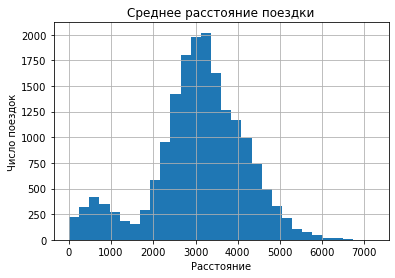

In [154]:
print(data_rides['distance'].describe())
data_rides['distance'].hist(bins = 30)
plt.title('Среднее расстояние поездки')
plt.xlabel('Расстояние')
plt.ylabel('Число поездок')

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


Text(0, 0.5, 'Число поездок')

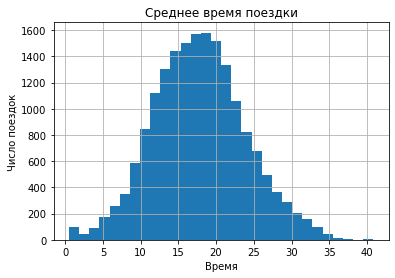

In [155]:
print(data_rides['duration'].describe())
data_rides['duration'].hist(bins = 30)
plt.title('Среднее время поездки')
plt.xlabel('Время')
plt.ylabel('Число поездок')

In [156]:
data_subs = pd.read_csv('data_project_subscriptions_4.csv')
print('Информация о подписке:')
display(data_subs)
print(data_subs.info())
# Таблицу о типе подписки нет необходимости проверять на наличие дубликатов, а так же оценивать её размер.

Информация о подписке:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


**Первые выводы по данным:**

В целом данные представлены достаточно ясно.

_Данные о пользователях:_<br>
Данные собраны хорошо:
- Пропущенных значений нет
- Есть малое число дубликатов.<br><br>

- Возраст клиентов представляет из себя распределение Пуассона близкое к нормальному с пиком в 25 лет.
- Выборка по городам достаточно равномерная
- Выборка по числу пользователей с подпиской и без достаточно равномерная.

_Данные о поездках:_<br>
Данные собраны хорошо 
- Пропущенных значений нет.
- Необходимо изменить тип столбца `date` c str на datetype
- Предстоит оценить число дубликатов самостоятельно.<br><br>

- Число поездок пользователем представляет из себя распределение Пуассона близкое к нормальному с пиком в 13 поездок.
- По среднему расстоянию, которое проезжает пользователь, можно судить, что существует два вида пользователей: <br> Первый - пользователи, которые проезжают совсем малые расстояния, менее километра (возможно кто-то ну очень сильно устаёт на работе). Второй - сильное большинство пользователей, среднее расстояние для них 3300м.
- Время поездки пользователем представляет из себя распределение Пуассона близкое к нормальному с пиком в 18 минут.

_Данные о подписке:_<br>
- Таблица просто показывает уникальные особенности подписки ultra.<br>
- Таблица заполнена полностью, недочетов в ней нет.

## Шаг 2. Предобработка данных

Таблица, содержащая данные о подписке не нуждается в предобработке.

Начнем предобработку с датафрейма о пользователях, в нем необходимо было обработать дубликаты:

In [157]:
data_users.duplicated().tail(32) # Немного странно, что все дубликаты расположены в конце списка, вряд-ли случайность.

1533    False
1534     True
1535     True
1536     True
1537     True
1538     True
1539     True
1540     True
1541     True
1542     True
1543     True
1544     True
1545     True
1546     True
1547     True
1548     True
1549     True
1550     True
1551     True
1552     True
1553     True
1554     True
1555     True
1556     True
1557     True
1558     True
1559     True
1560     True
1561     True
1562     True
1563     True
1564     True
dtype: bool

Оценим данные о дубликатах в таблицах о пользователях и о поездках:

In [158]:
print('Значение дубликатов от общего числа пользователей: {:.3%}'.format(data_users.duplicated().sum() / len(data_users)))

Значение дубликатов от общего числа пользователей: 1.981%


In [159]:
suspicious_duplicates = data_users[data_users.duplicated()]['user_id']
suspicious_duplicates # Интересно, что все дубликаты расположены на последних строках таблицы

1534     293
1535      16
1536     909
1537     403
1538     908
1539      43
1540     127
1541     659
1542     204
1543     153
1544    1245
1545     807
1546     924
1547     635
1548     136
1549     108
1550     737
1551     666
1552     297
1553     121
1554    1198
1555      72
1556     422
1557     611
1558    1237
1559     209
1560     829
1561     809
1562     307
1563      47
1564    1045
Name: user_id, dtype: int64

In [160]:
suspicious_duplicates_features = data_rides.loc[data_rides['user_id'].isin(suspicious_duplicates)]
suspicious_duplicates_features

,user_id,distance,duration,date
154,16,850.321732,13.125804,2021-02-18
155,16,2669.699887,9.160846,2021-03-03
156,16,3073.745017,25.442470,2021-03-06
157,16,4234.235859,17.114120,2021-04-02
158,16,2967.367846,18.695544,2021-04-16
...,...,...,...,...
14006,1245,3084.297976,30.823444,2021-11-08
14007,1245,2581.112640,22.324451,2021-11-12
14008,1245,3401.504555,17.849626,2021-11-27
14009,1245,2868.387220,18.822874,2021-12-08


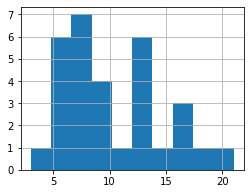

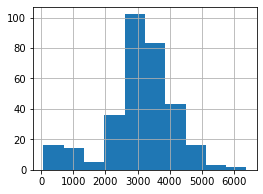

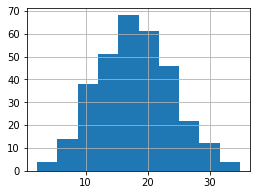

In [161]:
suspicious_duplicates_features['user_id'].value_counts().hist(figsize=(4, 3))
plt.show()
suspicious_duplicates_features['distance'].hist(figsize=(4, 3))
plt.show()
suspicious_duplicates_features['duration'].hist(figsize=(4, 3))
plt.show()

In [162]:
print('Значение данных о дубликатах от общего числа данных о поездках: \
      {:.3%}'.format(len(suspicious_duplicates_features) / len(data_rides)))

Значение данных о дубликатах от общего числа данных о поездках:       1.771%


Что бы опредедить, что следует с данными, следует отметить следующее:
1. Данные практически не отличаются от данных общей массы пользователей.
2. Данных очень мало (менее двух процентов от общего числа)

Такой малый процент данных никак не сможет оказать влияния на общую массу, значит можно исключить эти данные. <br>
Исключить данные следует из  обеих таблиц, чтобы избежать проблем при единовременной оценке их в будущем.

In [290]:
data_users = data_users.drop_duplicates().reset_index(drop = True)
data_users.duplicated().sum()

0

In [164]:
data_rides = data_rides[~data_rides.user_id.isin(suspicious_duplicates)]
data_rides.reset_index(drop = True)
len(data_rides)

17748

In [165]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')
data_rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [167]:
data_rides['date'].dt.year.unique()

array([2021], dtype=int64)

Данные взяты только за 2021 год, значит повторов за разные года в месяцах быть не может

In [169]:
data_rides['month'] = data_rides['date'].dt.month
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Итоги предобработки**

- [x] Устранены дубликаты
- [x] Исправлен тип столбца `date`
- [x] Добавлен столбец с номером месяца на основе столбца `date`

## Шаг 3. Исследовательский анализ данных

### 3.1 Частота встречаемости городов

Ранее уже был рассмотрен столбчатый граф распределения пользователей по городам. Рассмотрим эту величину подробнее, на этот раз применим круговую диаграмму, которая позволит ещё нагляднее сравнить число пользователей по городам между собой.

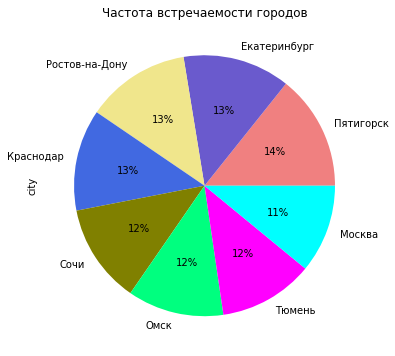

In [173]:
data_users['city'].value_counts().plot.pie(title = 'Частота встречаемости городов',
                                           figsize=(6, 6),
                                           autopct='%1.0f%%', 
                                           colors = ['lightcoral', 'slateblue', 'khaki', 'royalblue',
                                                     'olive', 'springgreen', 'magenta', 'aqua'])
plt.show()

### 3.2 Соотношение пользователей с подпиской и без подписки

Это соотношение было так же рассмотрено ранее, остановимся на нём подробнее.

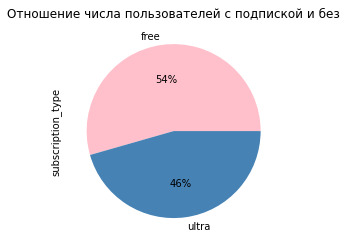

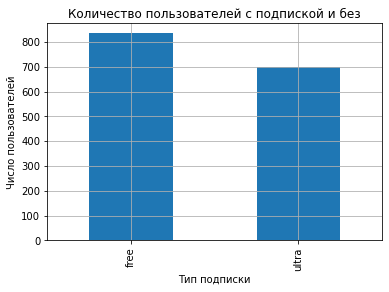

Число пользователей с подпиской ultra: 699 
Число пользователей без подписки: 835 
Разница: 136 или 16.287%


In [218]:
data_users['subscription_type'].value_counts().plot(kind = 'pie',
                                                    title = 'Отношение числа пользователей с подпиской и без', 
                                                    figsize=(4, 4),
                                                    autopct='%1.0f%%', 
                                                    colors = ['pink', 'steelblue'])
plt.show()
data_users['subscription_type'].value_counts().plot.bar(title = 'Количество пользователей с подпиской и без',
                                                        xlabel = 'Тип подписки',
                                                        ylabel = 'Число пользователей',
                                                        grid = True)
plt.show()
sub, no_sub = len(data_users.query('subscription_type == "ultra"')), len(data_users.query('subscription_type != "ultra"'))
print('Число пользователей с подпиской ultra:', sub,
      '\nЧисло пользователей без подписки:', no_sub,
      '\nРазница:', no_sub - sub, 'или {:.3%}'.format(1-sub/no_sub))

### Возраст пользователей

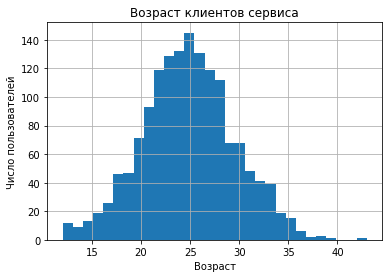

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


<AxesSubplot:ylabel='Возраст пользователей'>

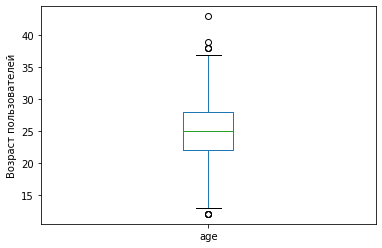

In [219]:
data_users['age'].hist(bins = 30)
plt.title('Возраст клиентов сервиса')
plt.xlabel('Возраст')
plt.ylabel('Число пользователей')
plt.show()

print(data_users['age'].describe())

data_users['age'].plot.box(ylabel = 'Возраст пользователей')

### 3.4 Расстояние, которое пользователь преодолел за одну поездку

count    17748.000000
mean      3070.530780
std       1118.037657
min          0.855683
25%       2539.623655
50%       3133.347629
75%       3778.598610
max       7211.007745
Name: distance, dtype: float64


Text(0, 0.5, 'Число поездок')

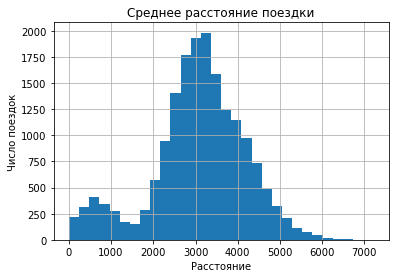

In [220]:
print(data_rides['distance'].describe())
data_rides['distance'].hist(bins = 30)
plt.title('Среднее расстояние поездки')
plt.xlabel('Расстояние')
plt.ylabel('Число поездок')

### Продолжительность поездок

count    17748.000000
mean        17.802703
std          6.094085
min          0.500000
25%         13.599482
50%         17.673016
75%         21.717337
max         40.823963
Name: duration, dtype: float64


Text(0, 0.5, 'Число поездок')

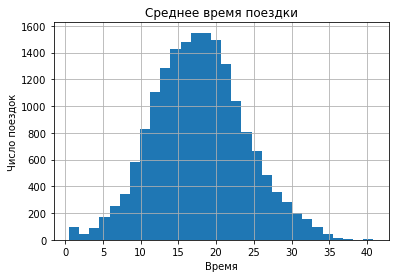

In [221]:
print(data_rides['duration'].describe())
data_rides['duration'].hist(bins = 30)
plt.title('Среднее время поездки')
plt.xlabel('Время')
plt.ylabel('Число поездок')

**Выводы**

1. _Частота встречаемости городов._<br> Пользователи по городам распределены очень равномерно.<br>Чаще всего в списке можно встретить Пятигорск, реже всего Москву.
2. _Соотношение пользователей с подпиской и без подписки._<br> Число пользователей без подписки совсем немного превосходит количество пользователей с ней (на 16.3%). относительно общего числа пользователей, подпиской владеют 46%.
3. _Возраст пользователей._<br> Возраст клиентов варьируется от 12 до 43 лет, чаще всего можно встретить пользователей 25 лет и куда сложнее полльзователя старше 33 и младше 18 лет.
4. _Расстояние, которое пользователь преодолел за одну поездку._<br> Расстояние распределено согласно распределению Пуассона близко к нормальному. Самое короткое расстояние чуть больше 0.85км, а самое большое свыше 7км. В среднем пользователь за одну сессию проезжает около 3.3км.
5. _Продолжительность поездок_<br>В среднем пользователи тратят на поездку от 12 до 22 минут. Наименьшее время поездки - полминуты (за такое время невозможно куда-либо доехать, наверное пользователь передумал). Самая продолжительная поездка заняла почти 41 минуту.

## Шаг 4. Объединение данных

### 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм

In [223]:
data = data_users.merge(data_rides)
data = data.merge(data_subs)
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


### 4.2 Создадим ещё два датафрейма из датафрейма, созданного на предыдущем этапе:
- **c данными о пользователях без подписки**
- **c данными о пользователях с подпиской**


In [241]:
data_ultra = data[data['subscription_type'] == 'ultra']
display(data_ultra.head(3))
data_free = data[data['subscription_type'] == 'free']
data_free = data_free.reset_index(drop = True)
data_free.head(3)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0


### 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

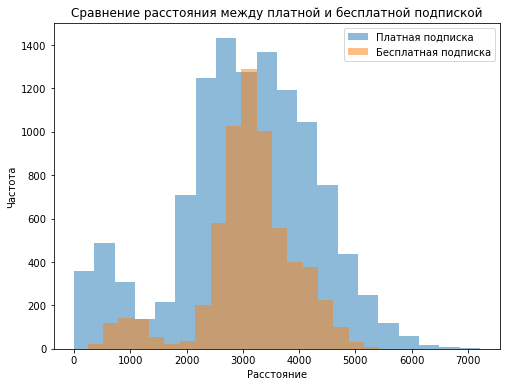

t-статистика: 4.445183088726353
p-значение: 8.83691501558091e-06


In [245]:
t_statistic, p_value = st.ttest_ind(data_ultra['distance'], data_free['distance'], equal_var=False)

plt.hist(data_free['distance'], bins=20, alpha=0.5, label='Платная подписка')
plt.hist(data_ultra['distance'], bins=20, alpha=0.5, label='Бесплатная подписка')
plt.xlabel('Расстояние')
plt.ylabel('Число поездок')
plt.title('Сравнение расстояния между платной и бесплатной подпиской')
plt.figure(figsize=(8, 6))
plt.legend()
plt.show()

print('t-статистика:', t_statistic)
print('p-значение:', p_value)

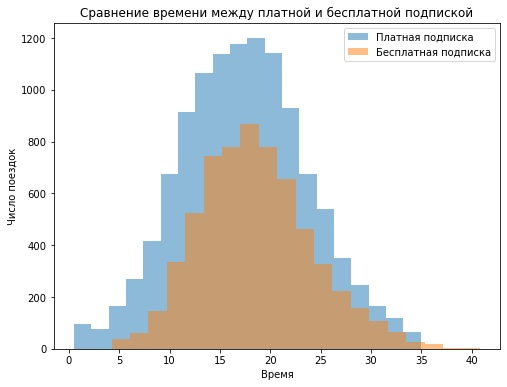

t-статистика: 12.716526595395441
p-значение: 7.530355872661871e-37


In [247]:
t_statistic, p_value = st.ttest_ind(data_ultra['duration'], data_free['duration'], equal_var=False)

plt.hist(data_free['duration'], bins=20, alpha=0.5, label='Платная подписка')
plt.hist(data_ultra['duration'], bins=20, alpha=0.5, label='Бесплатная подписка')
plt.xlabel('Время')
plt.ylabel('Число поездок')
plt.title('Сравнение времени между платной и бесплатной подпиской')
plt.figure(figsize=(8, 6))
plt.legend()
plt.show()

print('t-статистика:', t_statistic)
print('p-значение:', p_value)

**Вывод**

- [x] Объеденены датафреймы в один `data`
- [x] Из `data` созданы ещё два датафрейма: `data_ultra` и `data_free`.
- [x] Проаналиларованы данные по отдельности для пользователей с подпиской и без.

Сравнение данных о пользователях с подпиской и без дало следующие результаты:

1. _Дистанция поездки_
- Пользователи с подпиской в среднем проезжают меньшее расстояние, чем пользователи без неё.
- t-статистика равна 4.445183088726353
- p-значение равно 8.83691501558091e-06
- t-статистика показывает различие между средними значениями в столбцах датасетов, p-значение очень мало, значит делаем вывод о наличии статистически значимой разницы в расстоянии между пользователями с платной подпиской и бесплатной.
2. _Время поездки_
- Пользователи с подпиской в среднем передвигаются меньше, чем пользователи без неё. 
- t-статистика равна 12.716526595395441
- p-значение равно 7.530355872661871e-37
- Выводы на основе результатов теста в данном случае аналогичны выводам о дистанции поездки.

## Шаг 5. Подсчёт выручки

### 5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными:
**Найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [261]:
data_agg = data.pivot_table(index = ['user_id', 'month'], values = ['distance', 'name', 'duration', 'subscription_type'],
                            aggfunc = {'distance': 'sum',
                                       'name' : 'count',
                                       'duration' : 'sum',
                                       'subscription_type': 'max'})

data_agg.rename(columns = {'name': 'rides_num'}, inplace = True)
data_agg.head()

distance   duration  rides_num subscription_type
user_id month                                                     
1       1      7027.511294  41.416640          2             ultra
        4       754.159807   6.232113          1             ultra
        8      6723.470560  44.776802          2             ultra
        10     5809.911100  31.578017          2             ultra
        11     7003.499363  53.397424          3             ultra

**В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.**

In [266]:
data_agg['duration'] = np.ceil(data_agg['duration'])


def revenue_month(row):
    if row['subscription_type'] == 'free':
        return row['rides_num']*50 + row['duration']*8
    if row['subscription_type'] == 'ultra':
        return 200 + row['duration']*6
    
    
data_agg['revenue_month'] = data_agg.apply(revenue_month, axis = 1)
data_agg.head()

distance  duration  rides_num subscription_type  \
user_id month                                                       
1       1      7027.511294      42.0          2             ultra   
        4       754.159807       7.0          1             ultra   
        8      6723.470560      45.0          2             ultra   
        10     5809.911100      32.0          2             ultra   
        11     7003.499363      54.0          3             ultra   

               revenue_month  
user_id month                 
1       1              452.0  
        4              242.0  
        8              470.0  
        10             392.0  
        11             524.0

- [x] Создан новый датафрейм `data_agg` на основе датафрейма `data`,  в него вошли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- [x] Вычислил помесячную выручку, которую принёс каждый пользователь. Данные об этом внес в соответствующий столбец таблицы `data_agg`.

## Шаг 6. Проверка гипотез

### 6.1 Тратят ли пользователи с подпиской больше времени на поездки?

H0: Пользователи с подпиской тратят на поездки столько же времени, сколько пользователи без неё.

In [273]:
results = st.ttest_ind(data_ultra['duration'], data_free['duration'])

print('p-значение =', results.pvalue)

if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение = 1.97533210973539e-34
Не отвергаем нулевую гипотезу


### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

H0: Среднее расстояние пользователей с подпиской 3130 метров.<br>
H1: Среднее расстояние пользователей с подпиской меньше 3130 метров.

In [274]:
results = st.ttest_1samp(data_ultra['distance'], 3130, alternative='less')

print('p-значение =', results.pvalue)

if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение = 0.16700817000741447
Не отвергаем нулевую гипотезу


### 6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

H0: Выручка пользователей с подпиской такая же, что у тех, у кого подписки нет.<br>
H1: Выручка пользователей с подпиской больше, чем у тех, у кого подписки нет.

In [289]:
results = st.ttest_ind(data_agg[data_agg['subscription_type'] == 'ultra']['revenue_month'],
                       data_agg[data_agg['subscription_type'] == 'free']['revenue_month'])

print('p-значение =', results.pvalue)

if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение = 1.8641928883387188e-36
Отвергаем нулевую гипотезу


**Вывод**

- Пользователи с подпиской тратят больше времени на на поездки, чем пользователи без неё.
- Нельзя однозначно утверждать, что пользователи с подпиской не выходят из 3130 метров за 1 поездку.
- Выручка пользователей с подпиской действительно больше, чем пользователей без неё.

## Вывод
В ходе работы мы выяснили следующее:

- Число пользователей без подписки превосходит количество пользователей с ней на 16.3%. относительно общего числа пользователей, подпиской владеют 46%.
- Возраст клиентов варьируется от 12 до 43 лет, чаще всего можно встретить пользователей 25 лет и куда сложнее пользователя старше 33 и младше 18 лет.
- Самое короткое расстояние чуть больше 0.85км, а самое большое свыше 7км. В среднем пользователь за одну сессию проезжает около 3.3км.
- В среднем пользователи тратят на поездку от 12 до 22 минут. Наименьшее время поездки - полминуты (за такое время невозможно куда-либо доехать, наверное пользователь передумал). Самая продолжительная поездка заняла почти 41 минуту.
- Пользователи с подпиской в среднем проезжают расстояние меньшее, чем пользователи без неё.
- Пользователи с подпиской тратят больше времени на на поездки, чем пользователи без неё.
- Пользователи с подпиской в среднем проезжают расстояние в районе 3130м.
- Выручка пользователей с подпиской действительно больше, чем пользователей без неё.

Основной фактор из представленных для компании - выручка пользователей. Тесты показывают, что пользователи с подпиской приносят больше выручки, нежели пользователи без неё, следовательно число пользователей с подпиской следует увеличить. <br> следует учитывать, что огромное число пользователей без подписки проезжают более 4 раз на самокате. Это значит, что они расходуют больше средств, чем могли бы. Для увеличения числа подписок можно провести какую-нибудь акцию, позволяющую пользователям без подписки оценить все преимуществапоследней, вероятно, многие пользователи будут готовы обзавестись ей после этого.

**Заключение о проделанной работе**

В ходе работы были предприняты следубщие шаги:
- [x] Считаны данные трёх таблиц и проанализированы первичные значения.
- [x] Устранены дубликаты
- [x] Изменены необходимые типы столбцов
- [x] Добавлены новые столбцы
- [x] Сделаны первые выводы о:
    - Частоте встречаемости городов
    - Соотношении пользователей с подпиской и без подписки
    - Возрасте пользователей
    - Расстоянии, которое пользователь преодолевает за одну поездку
    - Продолжительноси поездок
- [x] Объеденены датафреймы в один `data`
- [x] Из `data` созданы ещё два датафрейма: `data_ultra` и `data_free`.
- [x] Проаналиларованы данные по отдельности для пользователей с подпиской и без.
- [x] Сделаны выводы о дистанфии поездки и времени.
- [x] Создан новый датафрейм `data_agg` на основе датафрейма `data`,  в него вошли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- [x] Вычислена помесячная выручка, которую принёс каждый пользователь. Данные об этом внесены в соответствующий столбец таблицы `data_agg`.
- [x] Даны ответы на 3 гипотезы